<a href="https://colab.research.google.com/github/Mohanlakshmi1205/Mohan-Lakshmi/blob/main/Car_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car = pd.read_csv("/content/car data.csv")
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
car.shape

(301, 9)

In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car["Present_Price"].value_counts()

,count
Present_Price,
9.40,15
13.60,13
5.70,8
1.47,7
4.43,7
...,...
6.10,1
13.09,1
11.60,1


In [ ]:
print(car["Fuel_Type"].value_counts())
print(car["Seller_Type"].value_counts())
print(car["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
car.replace({"Fuel_Type" : {"Petrol" : 0,"Diesel" : 1,"CNG" : 2}},inplace = True)
car.replace({"Seller_Type" : {"Dealer" : 0,"Individual" : 1}},inplace=True)
car.replace({"Transmission" : {"Manual" : 0, "Automatic" : 1}},inplace=True)

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car.drop(["Car_Name","Selling_Price"],axis=1)
Y = car["Selling_Price"]

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=30)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_train)
print(y_pred)

[ 2.59831956e+00  8.98342777e+00  1.03831584e+01  1.77647945e+01
  8.35908542e+00  3.98442948e+00  9.25557584e+00  6.08669746e-01
  2.00727450e+00  7.27891632e+00  2.71011178e+00  4.46105265e+00
  6.43133024e+00  7.90271328e+00  6.31611184e+00  8.09468900e-01
 -5.89022540e-02  8.73374523e+00  1.01882299e+01  4.94130088e-01
  1.41580114e+01  1.01544823e-01  1.86432458e+00  1.77647945e+01
  2.33850019e+00  4.34070016e+00  3.31258154e+00  4.88750577e+00
  6.90820051e+00  1.96891201e+00 -8.35674300e-01  9.71674933e+00
  7.59927585e+00  5.14867241e+00  1.26523837e+00  4.44889602e+00
  7.52194115e+00  8.82782620e+00  3.35082414e+00  4.03192766e+00
  1.24670613e-01  1.47740170e+00  5.79758433e+00  1.07520666e+00
  1.68024056e+00  6.18445319e+00  3.62001356e+00  6.10642264e+00
  4.36407160e+00  2.53658887e-01  5.30970168e+00  7.08339174e-01
  4.39414536e+00  5.23448748e+00  2.66260609e+00  4.39444690e+00
  2.97812168e+00  2.77850974e+00  5.51963695e+00  1.38086293e+00
  1.63736857e+00 -4.18848

In [ ]:
error = metrics.r2_score(y_pred,Y_train)
print(error)

0.8806736638901165


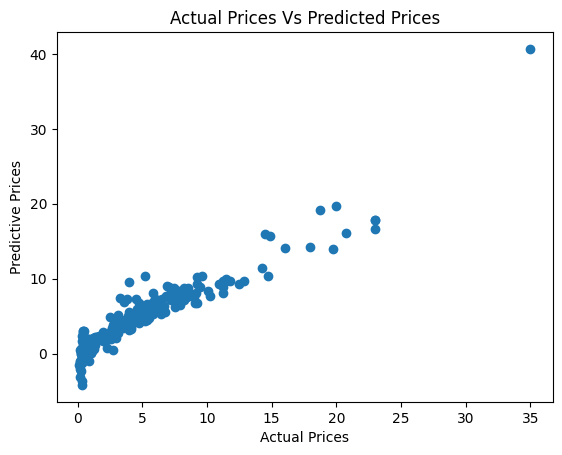

In [ ]:
plt.scatter(Y_train,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predictive Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [ ]:
y_pred1 = LR.predict(X_test)
print(y_pred1)

[ 1.99380445e+01  1.69217030e+00  1.78361867e+00  5.00085593e+00
  1.90932983e+00  2.13730118e+01 -1.09931323e+00  2.89217201e+00
  7.81093109e+00 -2.96604579e+00  4.10010337e+00 -7.80599219e+00
  5.48195284e+00  5.23246156e+00  4.44227707e+00  3.01029648e+00
  6.98397218e+00  6.80819627e+00  9.54576753e-02 -3.27812666e+00
  6.80456977e+00 -2.39882229e+00  2.12813973e-03 -1.92334327e+00
  4.39558705e+00  1.08456999e+01  1.46252542e+00 -5.76587861e-01
  7.81688042e-02  7.77648179e+00  6.01226885e+00]


In [ ]:
error1 = metrics.r2_score(Y_test,y_pred1)
print(error1)

0.7943303316849462


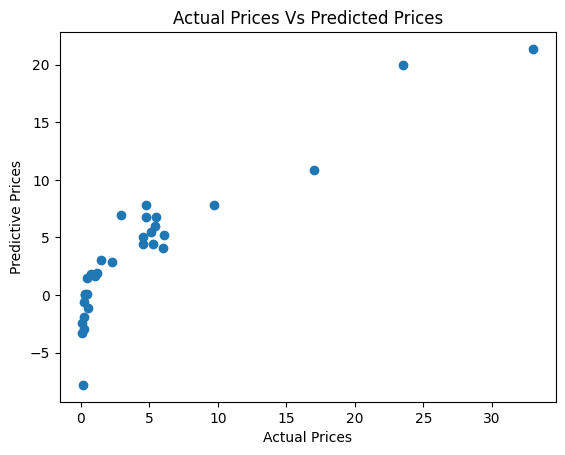

In [ ]:
plt.scatter(Y_test,y_pred1)
plt.xlabel("Actual Prices")
plt.ylabel("Predictive Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [ ]:
LR1 = Lasso()

In [ ]:
LR1.fit(X_train,Y_train)

Lasso()

In [ ]:
y_pred2 = LR1.predict(X_train)
print(y_pred2)

[ 2.61934755  9.90222273 10.61027878 16.45481533  6.69175669  3.53957537
  8.30242958  1.43840051  2.86173583  8.51889392  2.21764461  4.26059513
  6.23166084  6.10107339  6.9373362   1.65307649  0.92394961  7.31708846
  9.75032955  1.29500578 14.41302723  1.21340532  2.5536954  16.45481533
  3.10463674  4.11120524  3.24889858  9.03684956  5.51954298  2.66851041
  0.21647527  8.43829027  6.45668869  3.50266836  2.16292967  4.39855908
  7.89116097  7.44633001  2.7253115   3.9927017   1.17391033  2.53414406
  5.84746305  2.9097516   2.34489068  6.28435987  4.80977668  4.76291066
  4.76575184  1.17159997  4.08368187  1.66517228  3.99245703  5.15997046
  2.48632839  4.32977089  2.69092174  2.45220768  5.47995774  2.15062582
  1.68086586 -2.28676333  4.01522848  2.44622369 18.87311686  1.86558885
  2.00066174  5.43951918  3.47026465  2.01827442  5.04578662  3.98199364
  4.49225931  2.81271874  2.42393287  5.98865159 14.64248494  2.77423808
  2.568864    8.21915638  2.60093528  1.97957484  1

In [ ]:
error2 = metrics.r2_score(y_pred2,Y_train)
print(error2)

0.7970806883378523


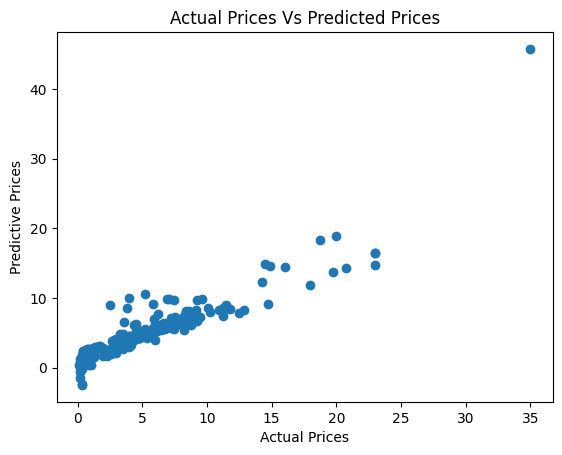

In [ ]:
plt.scatter(Y_train,y_pred2)
plt.xlabel("Actual Prices")
plt.ylabel("Predictive Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [ ]:
y_pred3 = LR1.predict(X_test)
print(y_pred3)

[19.03411581  2.49632832  2.47235283  4.91837949  2.75314036 20.34382078
  0.15904686  3.19923123  8.18921508 -0.77314873  5.21643273 -7.88027085
  4.00517294  5.15788099  4.35383872  2.90625554  3.75751691  7.41056065
  1.08062479 -1.72546011  5.29052172 -0.9229741   0.99131517 -0.51316948
  4.16781366 11.45015503  2.21463963  1.12297194  1.18929611  8.93398343
  4.62285743]


In [ ]:
error3 = metrics.r2_score(y_pred3,Y_test)
print(error3)

0.6403778978649531


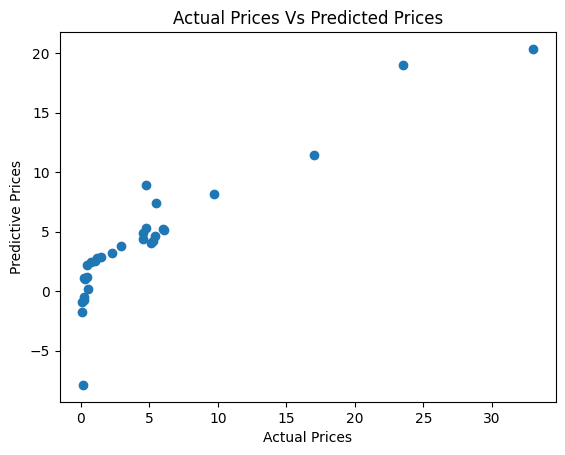

In [ ]:
plt.scatter(Y_test,y_pred3)
plt.xlabel("Actual Prices")
plt.ylabel("Predictive Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()